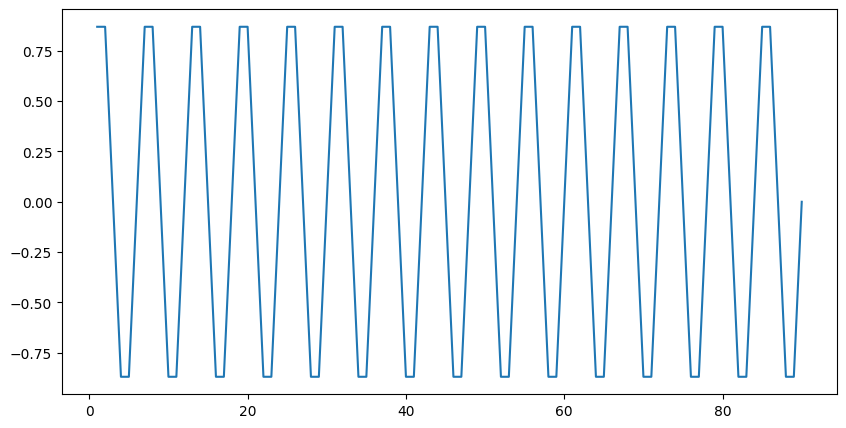

In [1]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

x=np.asarray([i for i in range(1,91)]);
y1=np.round(np.sin(x*np.pi/3),2);
fig, axes = plt.subplots(1,1)
fig.set_size_inches(10, 5)
axes.plot(x,y1);

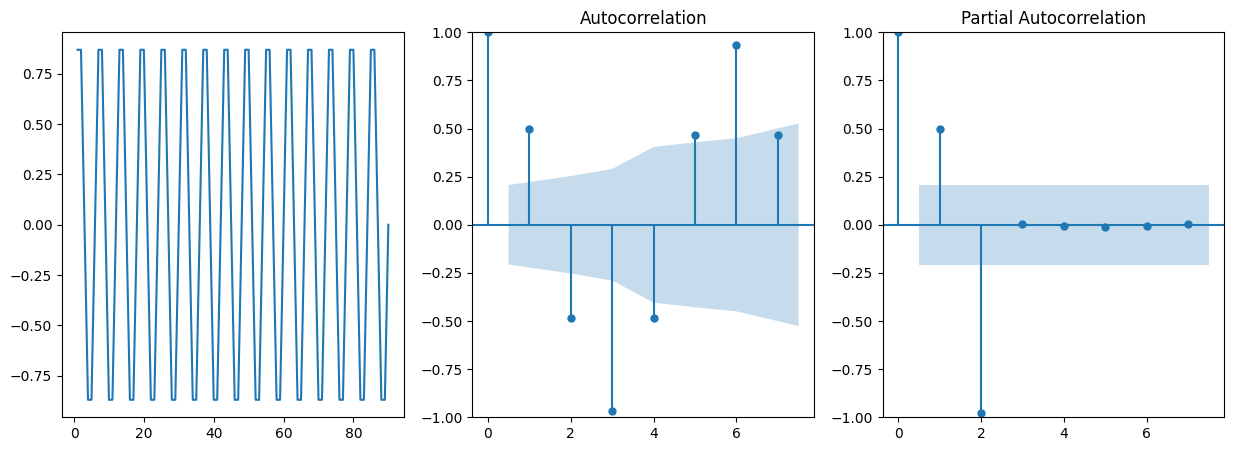

In [2]:
fig, axes = plt.subplots(1,3)
fig.set_size_inches(15, 5)
axes[0].plot(x,y1)
plot_acf(y1,lags=7,ax=axes[1]);
plot_pacf(y1,lags=7,method="ywm",ax=axes[2]);

In [3]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(y1)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5852472572772637.000000
p-value: 0.000000
Critical Values:
	1%: -3.515
	5%: -2.898
	10%: -2.586


In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose 

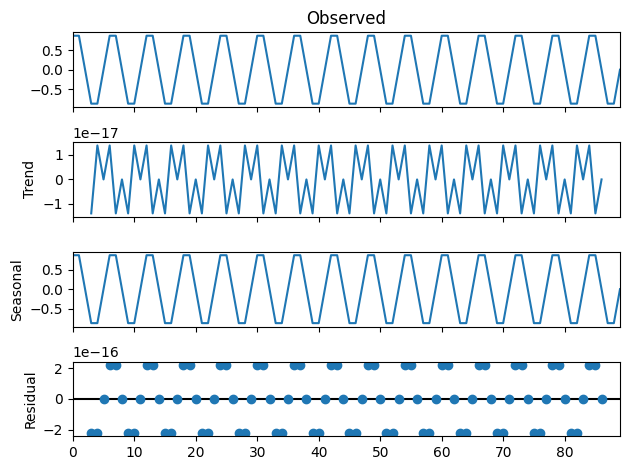

In [5]:
result=seasonal_decompose(y1,model="additive",period=6)
result.plot();

In [4]:
x_p=[i+len(x)+1 for i in range(len(x))]

In [5]:
from statsmodels.tsa.arima.model import ARIMA

In [6]:
modelo1_y1=ARIMA(y1,order=(2,0,3))
m1_y1=modelo1_y1.fit()
print("MSE",m1_y1.mse)
print("AIC",m1_y1.aic)
m1_y1.summary()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


MSE 0.01051014326945307
AIC -997.4382098346891


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   90
Model:                 ARIMA(2, 0, 3)   Log Likelihood                 505.719
Date:                Tue, 02 Apr 2024   AIC                           -997.438
Time:                        16:58:24   BIC                           -979.940
Sample:                             0   HQIC                          -990.382
                                 - 90                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.867e-05      0.000      0.258      0.796      -0.000       0.000
ar.L1          1.0003      0.002    576.561      0.000       0.997       1.004
ar.L2         -0.9998      0.000  -6718.915      0.000      -1.000      -0.999
ma.L1          0.9998      0.049     20.417      0.000       0.904       1.096
ma.L2         -1.0000      0.049    -20.417      0.000      -1.096      -0.904
ma.L3         -0.9998      0.049    -20.410      0.000      -1.096      -0.904
sigma2      5.033e-07   3.03e-07      1.659      0.097   -9.12e-08     1.1e-06
===================================================================================
Ljung-Box (L1) (Q):                  18.44   Jarque-Bera (JB):              8628.90
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.06   Skew:                             6.62
Prob(H) (two-sided):                  0.00   Kurtosis:                        49.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.08e+16. Standard errors may be unstable.
"""

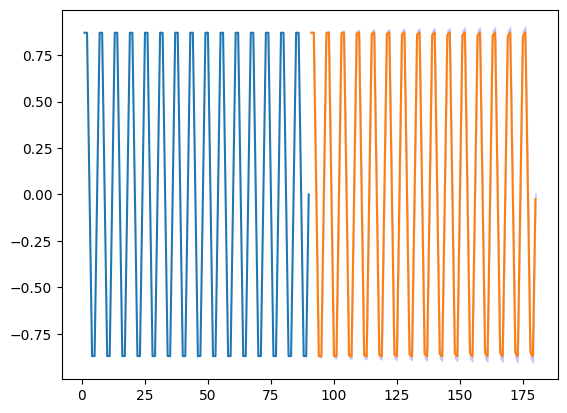

In [7]:
m1_y1_p = m1_y1.get_forecast(steps=len(y1))
m1_y1_ci = m1_y1_p.conf_int(0.05)
plt.plot(x,y1,x_p,m1_y1_p.predicted_mean)
plt.fill_between(x_p, m1_y1_ci[:,0], m1_y1_ci[:,1], color='b', alpha=.15)

In [10]:
len(y1)

90

In [8]:
yw=[]
yt=[]
for i in range(0,len(y1)):
    if i+3 < len(y1):
        row=[y1[i],y1[i+1],y1[i+2]]
        yw.append(row)
        yt.append(y1[i+3])
    else:
        break
print(len(yw))

87


In [9]:
yw

[[0.87, 0.87, 0.0],
 [0.87, 0.0, -0.87],
 [0.0, -0.87, -0.87],
 [-0.87, -0.87, -0.0],
 [-0.87, -0.0, 0.87],
 [-0.0, 0.87, 0.87],
 [0.87, 0.87, 0.0],
 [0.87, 0.0, -0.87],
 [0.0, -0.87, -0.87],
 [-0.87, -0.87, -0.0],
 [-0.87, -0.0, 0.87],
 [-0.0, 0.87, 0.87],
 [0.87, 0.87, 0.0],
 [0.87, 0.0, -0.87],
 [0.0, -0.87, -0.87],
 [-0.87, -0.87, -0.0],
 [-0.87, -0.0, 0.87],
 [-0.0, 0.87, 0.87],
 [0.87, 0.87, 0.0],
 [0.87, 0.0, -0.87],
 [0.0, -0.87, -0.87],
 [-0.87, -0.87, -0.0],
 [-0.87, -0.0, 0.87],
 [-0.0, 0.87, 0.87],
 [0.87, 0.87, 0.0],
 [0.87, 0.0, -0.87],
 [0.0, -0.87, -0.87],
 [-0.87, -0.87, -0.0],
 [-0.87, -0.0, 0.87],
 [-0.0, 0.87, 0.87],
 [0.87, 0.87, -0.0],
 [0.87, -0.0, -0.87],
 [-0.0, -0.87, -0.87],
 [-0.87, -0.87, -0.0],
 [-0.87, -0.0, 0.87],
 [-0.0, 0.87, 0.87],
 [0.87, 0.87, 0.0],
 [0.87, 0.0, -0.87],
 [0.0, -0.87, -0.87],
 [-0.87, -0.87, -0.0],
 [-0.87, -0.0, 0.87],
 [-0.0, 0.87, 0.87],
 [0.87, 0.87, -0.0],
 [0.87, -0.0, -0.87],
 [-0.0, -0.87, -0.87],
 [-0.87, -0.87, -0.0],
 [-0.

In [10]:
import tensorflow as tf
from datetime import datetime
from tensorflow import keras
from keras.layers import SimpleRNN, Input, Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import random as rd

2024-04-02 17:02:58.252967: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
seed=12122008
rd.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [13]:
yw_train, yw_val, yt_train, yt_val = train_test_split(yw, yt,
                                     test_size=0.2, random_state=seed)

In [14]:
yw_train

[[0.87, 0.87, -0.0],
 [0.87, 0.87, 0.0],
 [-0.0, 0.87, 0.87],
 [-0.87, -0.87, -0.0],
 [-0.0, 0.87, 0.87],
 [-0.87, -0.0, 0.87],
 [-0.87, -0.87, -0.0],
 [-0.87, -0.0, 0.87],
 [0.87, 0.0, -0.87],
 [0.87, -0.0, -0.87],
 [-0.87, -0.0, 0.87],
 [0.87, 0.87, 0.0],
 [-0.87, -0.87, -0.0],
 [-0.87, 0.0, 0.87],
 [-0.0, 0.87, 0.87],
 [0.87, 0.0, -0.87],
 [-0.87, -0.87, -0.0],
 [0.87, -0.0, -0.87],
 [-0.0, -0.87, -0.87],
 [-0.0, 0.87, 0.87],
 [0.87, 0.0, -0.87],
 [-0.87, -0.87, -0.0],
 [0.87, 0.87, -0.0],
 [-0.0, 0.87, 0.87],
 [-0.87, -0.0, 0.87],
 [-0.87, -0.87, -0.0],
 [0.87, 0.0, -0.87],
 [-0.87, -0.0, 0.87],
 [-0.87, -0.0, 0.87],
 [-0.87, -0.0, 0.87],
 [-0.0, 0.87, 0.87],
 [0.0, 0.87, 0.87],
 [-0.0, -0.87, -0.87],
 [0.87, -0.0, -0.87],
 [-0.87, -0.87, -0.0],
 [-0.0, 0.87, 0.87],
 [-0.87, -0.87, -0.0],
 [0.0, -0.87, -0.87],
 [0.87, 0.0, -0.87],
 [0.87, 0.87, 0.0],
 [-0.0, 0.87, 0.87],
 [0.87, 0.87, 0.0],
 [0.87, -0.0, -0.87],
 [0.87, 0.0, -0.87],
 [-0.87, -0.0, 0.87],
 [-0.0, 0.87, 0.87],
 [-0.8

In [15]:
yw_val

[[-0.0, -0.87, -0.87],
 [0.0, -0.87, -0.87],
 [0.87, 0.0, -0.87],
 [-0.87, -0.0, 0.87],
 [0.87, 0.87, 0.0],
 [-0.87, -0.87, -0.0],
 [-0.0, 0.87, 0.87],
 [0.0, -0.87, -0.87],
 [-0.87, -0.87, -0.0],
 [-0.87, -0.0, 0.87],
 [0.87, 0.0, -0.87],
 [0.87, 0.0, -0.87],
 [0.87, 0.87, 0.0],
 [-0.87, -0.0, 0.87],
 [0.87, 0.87, 0.0],
 [-0.0, 0.87, 0.87],
 [-0.87, -0.87, -0.0],
 [0.0, -0.87, -0.87]]

In [16]:
model = Sequential()
model.add(Input(name="serie",shape=(3,1)))
model.add(SimpleRNN(3))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 3)                 15        
                                                                 
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 19 (76.00 Byte)
Trainable params: 19 (76.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
tag="rnn_se"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.compile(optimizer='Adam', loss='mse', metrics=['mse','mae'])
spam_rnn = model.fit(yw_train, yt_train, validation_data=(yw_val,yt_val),
                     batch_size=1, epochs=36,verbose=1,callbacks=[tensorboard_callback])
model.save('models/model_{0}'.format(tag))

Epoch 1/36
69/69 [==============================] - 1s 6ms/step - loss: 1.2495 - mse: 1.2495 - mae: 1.0465 - val_loss: 1.1251 - val_mse: 1.1251 - val_mae: 0.9911
Epoch 2/36
69/69 [==============================] - 0s 2ms/step - loss: 1.0142 - mse: 1.0142 - mae: 0.9393 - val_loss: 0.9220 - val_mse: 0.9220 - val_mae: 0.8950
Epoch 3/36
69/69 [==============================] - 0s 2ms/step - loss: 0.8341 - mse: 0.8341 - mae: 0.8498 - val_loss: 0.7634 - val_mse: 0.7634 - val_mae: 0.8131
Epoch 4/36
69/69 [==============================] - 0s 2ms/step - loss: 0.6925 - mse: 0.6925 - mae: 0.7734 - val_loss: 0.6374 - val_mse: 0.6374 - val_mae: 0.7425
Epoch 5/36
69/69 [==============================] - 0s 2ms/step - loss: 0.5797 - mse: 0.5797 - mae: 0.7073 - val_loss: 0.5360 - val_mse: 0.5360 - val_mae: 0.6811
Epoch 6/36
69/69 [==============================] - 0s 2ms/step - loss: 0.4887 - mse: 0.4887 - mae: 0.6499 - val_loss: 0.4539 - val_mse: 0.4539 - val_mae: 0.6277
Epoch 7/36
69/69 [==========

INFO:tensorflow:Assets written to: models/model_rnn_se20240402-171005/assets


In [20]:
ultimo=yw[-1].copy()
ultimo

[0.0, -0.87, -0.87]

In [21]:
forecasts=[]
for i in range(90):
    data=np.array([ultimo])
    forecast=model.predict(data)
    valor=forecast[0][0]
    print(valor)
    forecasts.append(valor)
    ultimo.pop(0)
    ultimo.append(valor)

1/1 [==============================] - 0s 21ms/step
0.00043994782
1/1 [==============================] - 0s 20ms/step
0.8626242
1/1 [==============================] - 0s 19ms/step
0.8621806
1/1 [==============================] - 0s 20ms/step
-0.007417911
1/1 [==============================] - 0s 20ms/step
-0.8736214
1/1 [==============================] - 0s 20ms/step
-0.8661555
1/1 [==============================] - 0s 21ms/step
0.007236323
1/1 [==============================] - 0s 20ms/step
0.86525005
1/1 [==============================] - 0s 21ms/step
0.85794294
1/1 [==============================] - 0s 20ms/step
-0.014259497
1/1 [==============================] - 0s 20ms/step
-0.87612915
1/1 [==============================] - 0s 21ms/step
-0.86158353
1/1 [==============================] - 0s 20ms/step
0.014355203
1/1 [==============================] - 0s 20ms/step
0.867788
1/1 [==============================] - 0s 20ms/step
0.853167
1/1 [==============================] - 0s 20ms/ste

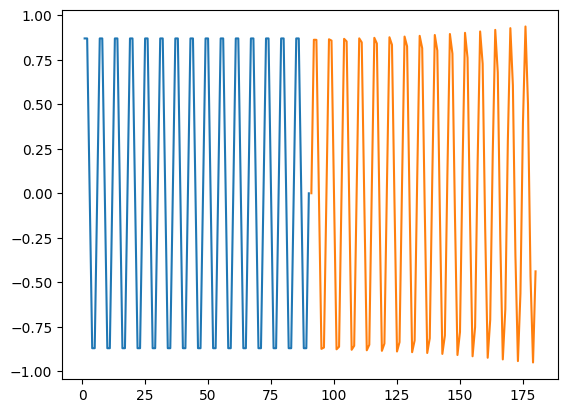

In [22]:
plt.plot(x,y1,x_p,forecasts)

In [23]:
model.layers[0].get_weights()

[array([[-1.4005538 ,  0.65087336, -0.47583842]], dtype=float32),
 array([[-0.627438  ,  0.7884621 , -0.2609207 ],
        [ 0.34472522,  0.225051  , -0.39657775],
        [-0.8929962 ,  1.5417719 ,  0.3826928 ]], dtype=float32),
 array([ 0.00574037, -0.00987965,  0.00654474], dtype=float32)]

In [24]:
model.layers[1].get_weights()

[array([[-0.90584433],
        [ 0.68008345],
        [-0.41643992]], dtype=float32),
 array([-0.00033731], dtype=float32)]